Resolutions from config: ('1000000:1Mb',)
Extracted resolution string: 1000000:1Mb
129
Data from /sample_weights in /home/dwk681/workspace/hypermatrix_test/hypermatrix/projects/single_cell_files/tensor_1Mb_cell_type_factors/chr2_sample_factors.h5:
[[2.04510665e-02 1.25569917e+00 1.20503299e+00 ... 4.73149521e-01
  1.05700463e+00 1.42740042e+00]
 [1.91179472e+00 2.12814630e+00 1.10892657e-01 ... 1.29094278e+00
  8.29852070e-01 4.12059365e-01]
 [8.29247999e-02 1.23459546e+00 9.77681158e-01 ... 4.67372227e-05
  8.24685617e-01 1.91656093e+00]
 ...
 [8.36934593e-01 1.04139707e+00 9.73299125e-01 ... 1.06376889e+00
  1.40534834e+00 9.07775139e-01]
 [4.20582122e-02 1.56982218e+00 1.61816457e+00 ... 4.87584946e-01
  7.80117842e-01 2.34604784e+00]
 [5.64249138e-01 1.46180782e+00 1.00944400e+00 ... 8.28070954e-01
  1.17519257e+00 1.88297407e-01]]
Shape: (10, 129)

Data from /modality_weights in /home/dwk681/workspace/hypermatrix_test/hypermatrix/projects/single_cell_files/tensor_1Mb_cell_type_fac

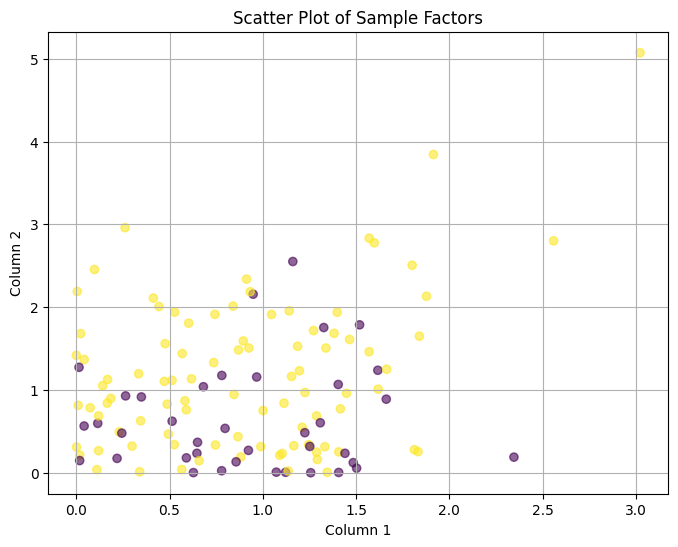

In [31]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from config_and_print import methy_directory, filtered_list, chrom_file, resolutions, output_directory, mappability_threshold, normalization
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import os
import matplotlib.colors as mcolors

# Ensure resolutions is treated as a tuple or list of strings
if isinstance(resolutions, str):
    resolutions = (resolutions,)

# Print resolutions for debugging 
print(f"Resolutions from config: {resolutions}")

# Extract resolution value and label from the resolutions string
resolution_str = resolutions[0]

# Debug print to check the value of resolution_str
print(f"Extracted resolution string: {resolution_str}")

def parse_resolution(resolution_str):
    if ':' in resolution_str:
        resolution_value, resolution_label = resolution_str.split(':')
        try:
            resolution = int(resolution_value)
            return resolution, resolution_label
        except ValueError:
            raise ValueError(f"Resolution value should be an integer: '{resolution_value}' in '{resolution_str}'")
    else:
        raise ValueError(f"Invalid resolution format: '{resolution_str}'. Expected format 'value:label', e.g., '1000000:1Mb'.")

resolution, resolution_label = parse_resolution(resolution_str)



prefix_file_path = filtered_list
# Read prefixes from the file
with open(prefix_file_path, 'r') as f:
    prefixes = [line.strip() for line in f] 

file_list = prefixes

chromosomes_info = {
    '1': 249250621,
    '2': 243199373,
    '3': 198022430,
    '4': 191154276,
    '5': 180915260,
    '6': 171115067,
    '7': 159138663,
    '8': 146364022,
    '9': 141213431,
    '10': 135534747,
    '11': 135006516,
    '12': 133851895,
    '13': 115169878,
    '14': 107349540,
    '15': 102531392,
    '16': 90354753,
    '17': 81195210,
    '18': 78077248,
    '19': 59128983,
    '20': 63025520,
    '21': 48129895,
    '22': 51304566,
}

########################################################################
# create the cell type dictionary
# [TO DO] This needs to be replaced with SNPS code 
########################################################################
# Define the path file with prefixes and colors in the following form
#1       sc1.ACTTGA      red
#2       sc1.GCCAAT      red
#3       sc1.TAGCTT      red
#4       sc10.TAGCTT     blue
#
filename = '../../bin/name.order.HCG_methy.with_color.txt'

# Initialize an empty dictionary to store cell ID and color
cell_color_dict = {}

# Open and read the file
with open(filename, 'r') as file:
    for line in file:
        # Split the line into parts
        parts = line.strip().split()
        # Extract cell ID and color
        cell_id = parts[1]
        color = parts[2]
        # Store in dictionary
        cell_color_dict[cell_id] = color

# Define the path to the tensor sample order file
#This file contains the prefixes in the form
#sc11.ACTTGA
#sc11.CGATGT
#sc11.GCCAAT
#
tensor_order_filename = f'{output_directory}/filtered_bam_list.txt'

# Initialize a list to store the 1s and 0s
color_vector = []

# Open and read the tensor sample order file
with open(tensor_order_filename, 'r') as file:
    for line in file:
        sample_id = line.strip()  # Remove any trailing newlines or spaces
        if sample_id in cell_color_dict and cell_color_dict[sample_id] == 'red':
            color_vector.append(1)
        else:
            color_vector.append(0)

# Output the color vector to check
print(len(color_vector))

# Create a mapping dictionary
color_mapping = {
    'red': 'imr90',
    'blue': 'gm12878'
}

# Update the dictionary using the mapping
updated_cell_color_dict = {key: color_mapping[value] for key, value in cell_color_dict.items()}







##################

#color_list = [line.strip() for line in data_string.strip().split('\n')]

#binary_list = [0 if color == 'red' else 1 for color in color_list]

#print(len(binary_list))    

#mask_IMR90 'blue' 1
#mask_GM12878 'red' 0






path = '/home/dwk681/workspace/hypermatrix_test/hypermatrix/projects/single_cell_files/tensor_1Mb_cell_type_factors/'

# Define the paths to the HDF5 files
sample_file = path + 'chr2_sample_factors.h5' 
modality_file = path + 'chr2_modality_factors.h5'   
genomic_file = path + 'chr2_genomic_factors.h5' 

# Define the dataset names (they must match what was used when saving the files)
dataset_genomic = '/genomic_weights'
dataset_sample = '/sample_weights'
dataset_modality = '/modality_weights'

# Function to load and display data from an HDF5 file
def load_and_display_hdf5(file_path, dataset_name):
    with h5py.File(file_path, 'r') as file:
        data = file[dataset_name][:]
        print(f"Data from {dataset_name} in {file_path}:")
        print(data)
        print("Shape:", data.shape)
        print()
    return data

# Load the results
sample_data = load_and_display_hdf5(sample_file, dataset_sample)
modality_data = load_and_display_hdf5(modality_file, dataset_modality)
genomic_data = load_and_display_hdf5(genomic_file, dataset_genomic)

# Scatter plot for modality data
plt.figure(figsize=(8, 6))
plt.scatter(sample_data[8, :], sample_data[9, :], c=color_vector, alpha=0.6)
plt.title("Scatter Plot of Sample Factors")
plt.xlabel("Column 1")
plt.ylabel("Column 2")
plt.grid(True)
plt.show()
